In [5]:
#Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from pathlib import Path
%matplotlib inline

In [6]:
#Read Whale returns

whale_returns_csv = Path('../Pandas_HW2/whale_returns.csv')
whale_returns_data = pd.read_csv(whale_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_returns_data.sort_index(inplace=True)
whale_returns_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [7]:
# Count nulls
whale_returns_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [8]:
# Drop nulls
whale_returns_data.dropna(inplace=True)
whale_returns_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [9]:
#Read Alogo returns
algo_returns_csv = Path('../Pandas_HW2/algo_returns.csv')
algo_returns_data = pd.read_csv(algo_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_returns_data.sort_index(inplace=True)
algo_returns_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [10]:
# Count nulls
algo_returns_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls
algo_returns_data.dropna(inplace=True)
algo_returns_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [12]:
#Read S&P 500 Closing Prices
sp500_history_csv = Path('../Pandas_HW2/sp500_history.csv')
sp500_history_data = pd.read_csv(sp500_history_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_history_data.sort_index(inplace=True)
sp500_history_data.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [13]:
# Check Data Types
sp500_history_data.dtypes

Close    object
dtype: object

In [14]:
# Fix Data Types
sp500_history_data['Close']=sp500_history_data['Close'].str.replace('$','')
sp500_history_data['Close']=sp500_history_data['Close'].astype('float')

In [15]:
# Check Data Types
sp500_history_data.dtypes

Close    float64
dtype: object

In [16]:
# Calculate Daily Returns
sp500_returns = sp500_history_data.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [17]:
# Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [18]:
# Rename Column to S&P 500
sp500_returns.columns=["S&P 500"]
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [19]:
# Concatenate all DataFrames into a single DataFrame
portfolio_returns_df = pd.concat([whale_returns_data, algo_returns_data, sp500_returns], axis = 'columns', join = 'inner' )
portfolio_returns_df = portfolio_returns_df.dropna()
portfolio_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


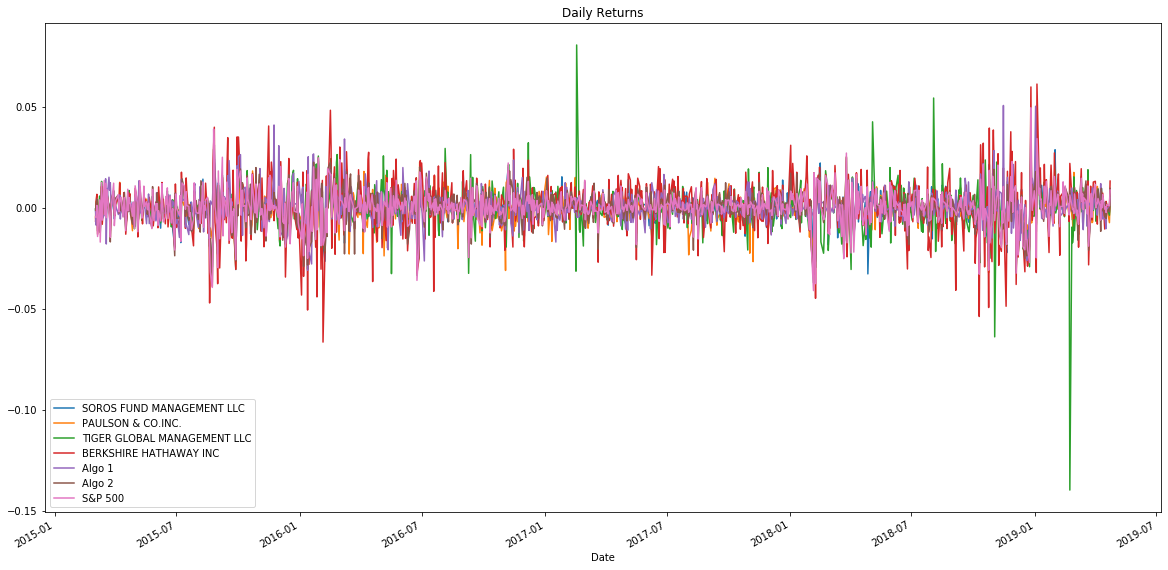

In [20]:
# Plot daily returns
portfolio_returns_df.plot(figsize=(20,10), title ="Daily Returns")

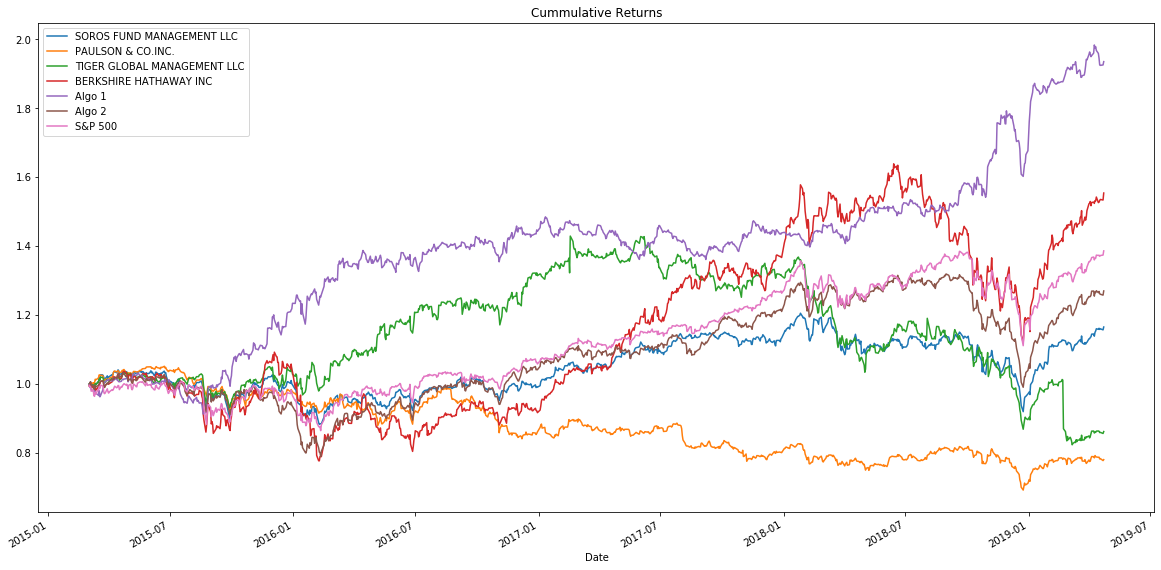

In [21]:
# Plot cumulative returns
cumulative_portfolio_returns = (1+ portfolio_returns_df).cumprod()
cumulative_portfolio_returns.plot(figsize = (20,10), title = 'Cummulative Returns')

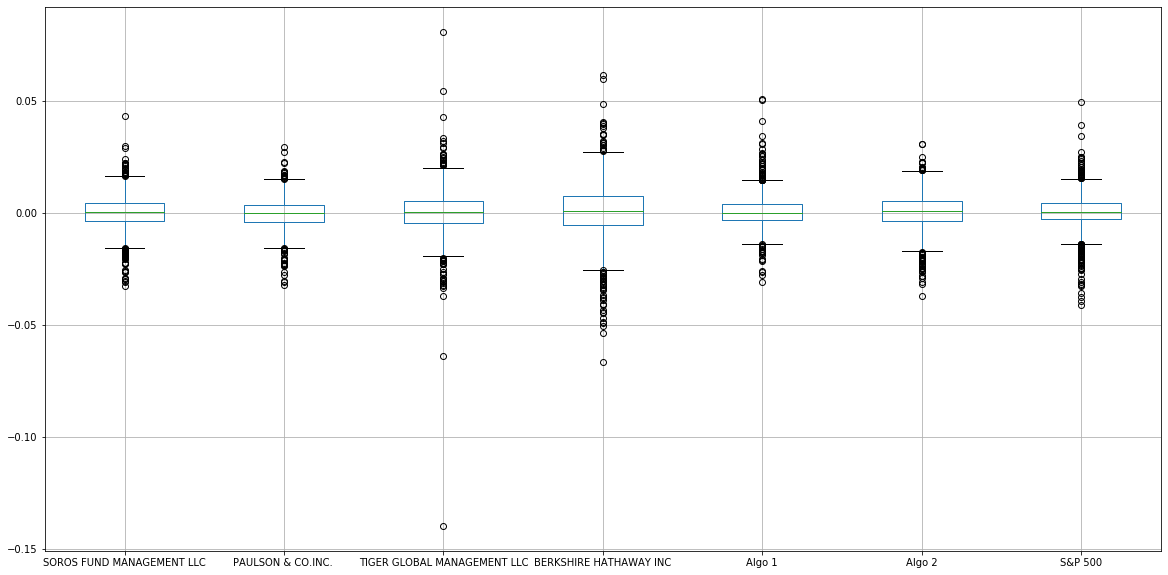

In [22]:
# Box plot to visually show risk
boxplot = portfolio_returns_df.boxplot(figsize=(20,10), grid = True)

In [23]:
# Daily Standard Deviations: Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
portfolio_returns_std = portfolio_returns_df.std()
portfolio_returns_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [24]:
# Determine which portfolios are riskier than the S&P 500
portfolio_returns_std > portfolio_returns_std['S&P 500']

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [25]:
# Calculate the annualized standard deviation (252 trading days)
yearly_portfolio_returns_std = portfolio_returns_std*np.sqrt(252)
yearly_portfolio_returns_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

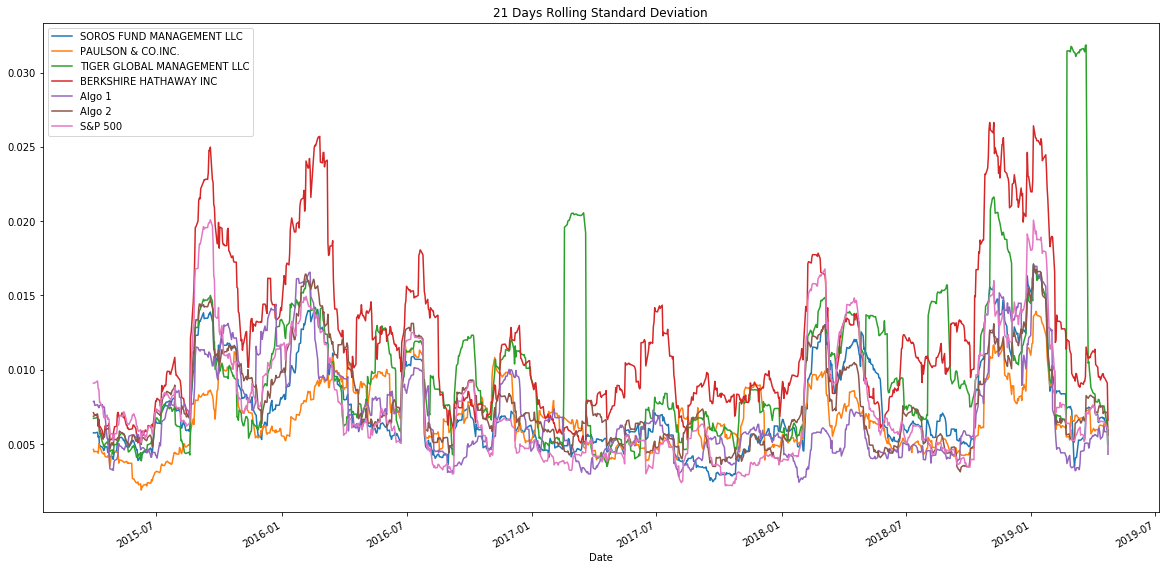

In [26]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
rolling_portfolio_returns_std = portfolio_returns_df.rolling(window=21).std()
rolling_portfolio_returns_std.plot(figsize = (20,10), title="21 Days Rolling Standard Deviation")

In [27]:
# Construct a correlation table
portfolio_correlation = portfolio_returns_df.corr()
portfolio_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


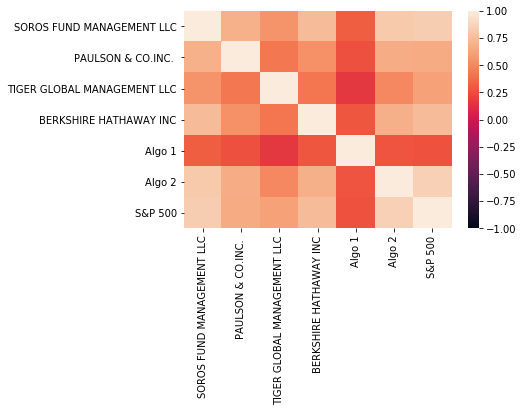

In [28]:
sns.heatmap(portfolio_correlation, vmin=1, vmax=-1)

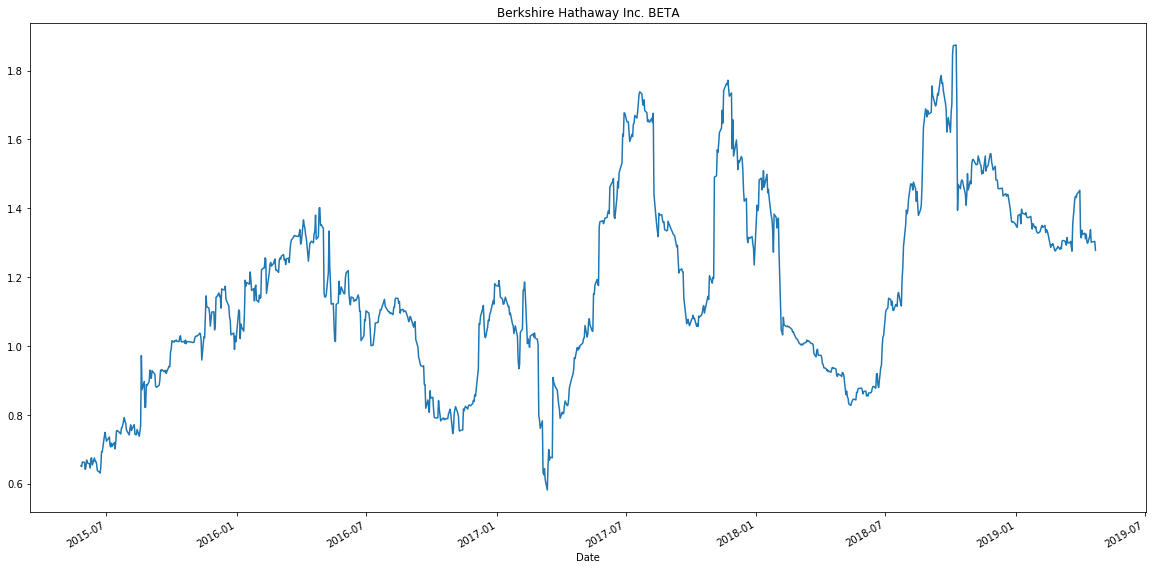

In [29]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)

portfolio_returns_cov = portfolio_returns_df.rolling(window=60).cov(portfolio_returns_df['S&P 500'])
sp500_var_roll = portfolio_returns_df['S&P 500'].rolling(window=60).var()
berkshire_sp500_beta = portfolio_returns_cov['BERKSHIRE HATHAWAY INC']/sp500_var_roll
berkshire_sp500_beta.plot(figsize=(20,10), title = 'Berkshire Hathaway Inc. BETA')

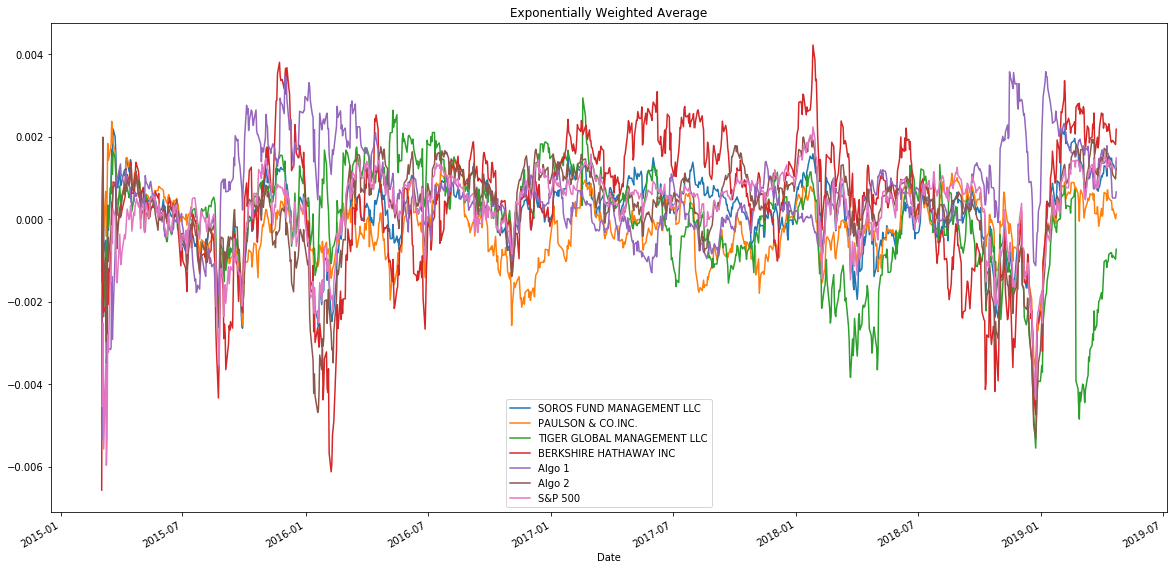

In [30]:
# Calculate a rolling window using the exponentially weighted moving average. 
portfolio_returns_ewm = portfolio_returns_df.ewm(halflife=21).mean()
portfolio_returns_ewm.plot(figsize=(20,10), title = 'Exponentially Weighted Average')

In [31]:
# Calculate annualized Sharpe Ratios
portfolio_returns_sharpe_ratios = (portfolio_returns_df.mean() * 252) / (portfolio_returns_df.std() * np.sqrt(252))
portfolio_returns_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

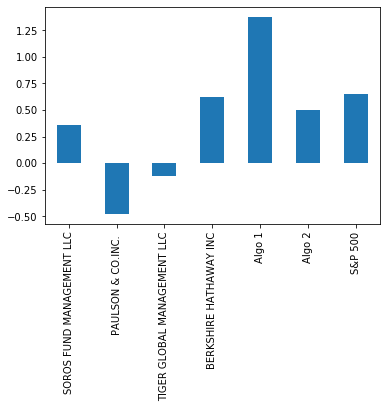

In [32]:
# Visualize the sharpe ratios as a bar plot
portfolio_returns_sharpe_ratios.plot(kind='bar')

In [34]:
# PHD Portfolio 
# TESLA: TSLA
# SHOPIFY: SHOP
# DOCUSIGN: DOCU

In [35]:
# Read the first stock: TESLA
tesla_csv = Path('../Pandas_HW2/Tesla_historical.csv')
tesla_data = pd.read_csv(tesla_csv, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
tesla_data.sort_index(inplace=True)
tesla_data.head()

,Symbol,NOCP
Trade DATE,,
2015-03-02,TSLA,197.33
2015-03-03,TSLA,199.56
2015-03-04,TSLA,202.44
2015-03-05,TSLA,200.63
2015-03-06,TSLA,193.88


In [36]:
# Read the second stock: SHOPIFY
shopify_csv = Path('../Pandas_HW2/Shopify_historical.csv')
shopify_data = pd.read_csv(shopify_csv, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
shopify_data.sort_index(inplace=True)
shopify_data.head()

,Symbol,NOCP
Trade DATE,,
2015-05-21,SHOP,25.68
2015-05-22,SHOP,28.31
2015-05-26,SHOP,29.65
2015-05-27,SHOP,27.50
2015-05-28,SHOP,27.45


In [37]:
# Read the third stock: DOCUSIGN
docusign_csv = Path('../Pandas_HW2/Docusign_historical.csv')
docusign_data = pd.read_csv(docusign_csv, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
docusign_data.sort_index(inplace=True)
docusign_data.head()

,Symbol,NOCP
Trade DATE,,
2018-04-27,DOCU,39.73
2018-04-30,DOCU,38.63
2018-05-01,DOCU,39.45
2018-05-02,DOCU,39.32
2018-05-03,DOCU,41.96


In [38]:
# Concatenate all stocks into a single DataFrame
phd_portfolio_stocks_price_df = pd.concat([tesla_data, shopify_data, docusign_data], axis = 'columns', join = 'inner' )
phd_portfolio_stocks_price_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-04-27,NaN,294.08,SHOP,126.62,DOCU,39.73
2018-04-30,NaN,293.90,SHOP,133.63,DOCU,38.63
2018-05-01,NaN,299.92,SHOP,127.68,DOCU,39.45
2018-05-02,NaN,301.15,SHOP,124.81,DOCU,39.32
2018-05-03,NaN,284.45,SHOP,135.17,DOCU,41.96


In [39]:
# Reset the index
phd_portfolio_stocks_price_df.reset_index()
phd_portfolio_stocks_price_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-04-27,NaN,294.08,SHOP,126.62,DOCU,39.73
2018-04-30,NaN,293.90,SHOP,133.63,DOCU,38.63
2018-05-01,NaN,299.92,SHOP,127.68,DOCU,39.45
2018-05-02,NaN,301.15,SHOP,124.81,DOCU,39.32
2018-05-03,NaN,284.45,SHOP,135.17,DOCU,41.96


In [32]:
# Pivot so that each column of prices represents a unique symbol
phdn_portfolio_stocks_price_df = phd_portfolio_stocks_price_df.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
phdn_portfolio_stocks_price_df.head()

Symbol,DOCU,SHOP,TSLA
Trade DATE,,,
2019-07-01,50.65,304.68,227.17
2019-07-02,51.34,311.96,224.55
2019-07-03,51.65,313.33,234.90
2019-07-05,52.16,313.72,233.10
2019-07-08,51.65,321.00,230.34


In [40]:
# Concatenate all stocks into a single DataFrame
phd_portfolio_stocks_price_df = pd.concat([tesla_data, shopify_data, docusign_data], axis = 'columns', join = 'inner' )
phd_portfolio_stocks_price_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-04-27,NaN,294.08,SHOP,126.62,DOCU,39.73
2018-04-30,NaN,293.90,SHOP,133.63,DOCU,38.63
2018-05-01,NaN,299.92,SHOP,127.68,DOCU,39.45
2018-05-02,NaN,301.15,SHOP,124.81,DOCU,39.32
2018-05-03,NaN,284.45,SHOP,135.17,DOCU,41.96


In [41]:
# Pivot so that each column of prices represents a unique symbol
phd_portfolio_stocks_price_df = phd_portfolio_stocks_price_df.pivot_table(values="NOCP",index="Trade DATE")
phd_portfolio_stocks_price_df.columns = ['TSLA', 'SHOP', 'DOCU']
phd_portfolio_stocks_price_df.head()

,TSLA,SHOP,DOCU
Trade DATE,,,
2018-04-27,294.08,126.62,39.73
2018-04-30,293.90,133.63,38.63
2018-05-01,299.92,127.68,39.45
2018-05-02,301.15,124.81,39.32
2018-05-03,284.45,135.17,41.96


In [42]:
# Drop Nulls
phd_portfolio_stocks_price_df.dropna(inplace=True)
phd_portfolio_stocks_price_df.head()

,TSLA,SHOP,DOCU
Trade DATE,,,
2018-04-27,294.08,126.62,39.73
2018-04-30,293.90,133.63,38.63
2018-05-01,299.92,127.68,39.45
2018-05-02,301.15,124.81,39.32
2018-05-03,284.45,135.17,41.96


In [43]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
phd_portfolio_stocks_returns_df = phd_portfolio_stocks_price_df.pct_change()
phd_portfolio_stocks_returns_df = phd_portfolio_stocks_returns_df.dropna()
custom_phd_portfolio_stocks_returns_df = phd_portfolio_stocks_returns_df.dot(weights)
custom_phd_portfolio_stocks_returns_df.columns = ['PHD Custom']
custom_phd_portfolio_stocks_returns_df.head()

Trade DATE
2018-04-30    0.009021
2018-05-01   -0.000939
2018-05-02   -0.007224
2018-05-03    0.031564
2018-05-04    0.006753
dtype: float64

In [44]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
joint_portfolio_returns_df = pd.concat([portfolio_returns_df,phd_portfolio_stocks_returns_df], axis = 'columns', join = 'inner')
joint_portfolio_returns_df.columns = ['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC.','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2','S&P 500','TSLA', 'SHOP', 'DOCU']
joint_portfolio_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,TSLA,SHOP,DOCU
2018-04-30,0.004538,-0.011806,-0.015002,-0.001435,-0.002609,-0.008726,-0.008188,-0.000612,0.055363,-0.027687
2018-05-01,0.008046,0.001157,-0.006231,0.005326,0.001589,0.002106,0.002549,0.020483,-0.044526,0.021227
2018-05-02,-0.007923,-0.011448,-0.019454,0.000131,0.005558,0.001319,-0.007206,0.004101,-0.022478,-0.003295
2018-05-03,-0.005584,-0.010606,0.008883,0.000822,0.008960,-0.002614,-0.002254,-0.055454,0.083006,0.067141
2018-05-04,0.013363,0.006909,0.042637,0.008794,0.000648,0.008404,0.012811,0.033890,0.007102,-0.020734


In [45]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joint_portfolio_returns_df=joint_portfolio_returns_df.dropna()
joint_portfolio_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,TSLA,SHOP,DOCU
2018-04-30,0.004538,-0.011806,-0.015002,-0.001435,-0.002609,-0.008726,-0.008188,-0.000612,0.055363,-0.027687
2018-05-01,0.008046,0.001157,-0.006231,0.005326,0.001589,0.002106,0.002549,0.020483,-0.044526,0.021227
2018-05-02,-0.007923,-0.011448,-0.019454,0.000131,0.005558,0.001319,-0.007206,0.004101,-0.022478,-0.003295
2018-05-03,-0.005584,-0.010606,0.008883,0.000822,0.008960,-0.002614,-0.002254,-0.055454,0.083006,0.067141
2018-05-04,0.013363,0.006909,0.042637,0.008794,0.000648,0.008404,0.012811,0.033890,0.007102,-0.020734


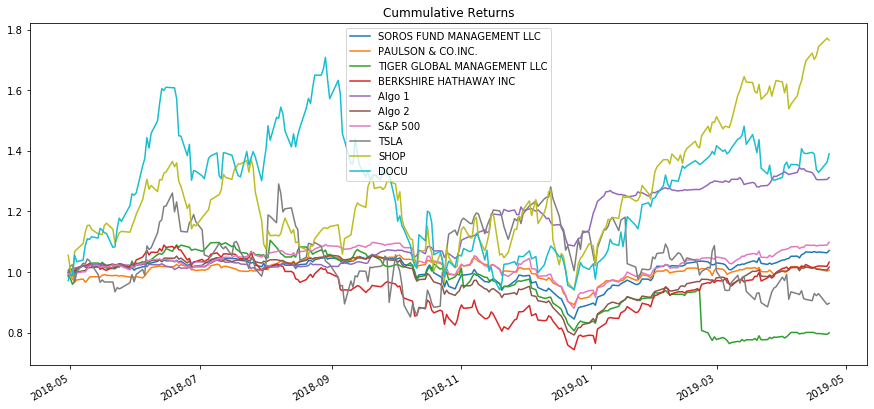

In [57]:
#Cummulative Return comparison
joint_portfolio_returns_cum = (1+ joint_portfolio_returns_df).cumprod()
joint_portfolio_returns_cum.plot(figsize = (15,7), title = 'Cummulative Returns')

In [58]:
round((joint_portfolio_returns_cum.tail(1)-1)*100,1)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,TSLA,SHOP,DOCU
2019-04-23,7.1,0.7,-20.0,3.3,31.2,1.7,9.9,-10.3,76.5,39.0


In [46]:
# Risk
joint_portfolio_returns_df.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.145599
PAULSON & CO.INC.              0.117530
TIGER GLOBAL MANAGEMENT LLC    0.233994
BERKSHIRE HATHAWAY INC         0.242542
Algo 1                         0.131617
Algo 2                         0.137578
S&P 500                        0.150559
TSLA                           0.589674
SHOP                           0.514970
DOCU                           0.492176
dtype: float64

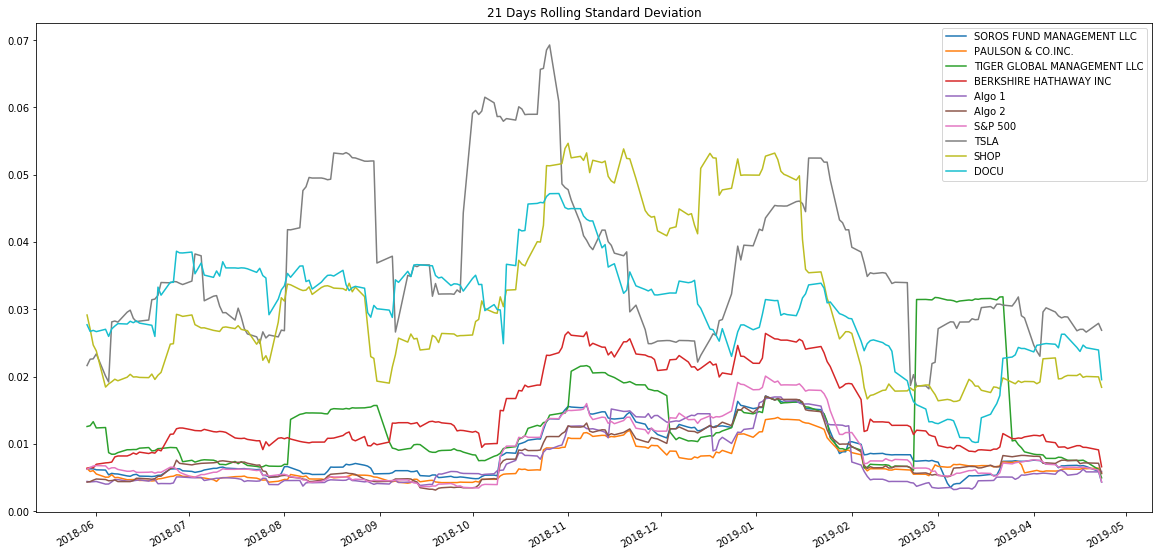

In [47]:
# Rolling
joint_portfolio_returns_df.rolling(window=21).std().plot(figsize=(20,10), title="21 Days Rolling Standard Deviation")

In [49]:
# Annualized Sharpe Ratios
joint_portfolio_returns_ratios = (joint_portfolio_returns_df.mean() * 252) / (joint_portfolio_returns_df.std() * np.sqrt(252))

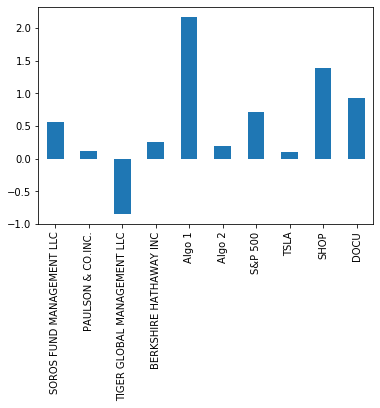

In [50]:
# Visualize the sharpe ratios as a bar plot
joint_portfolio_returns_ratios.plot(kind='bar')

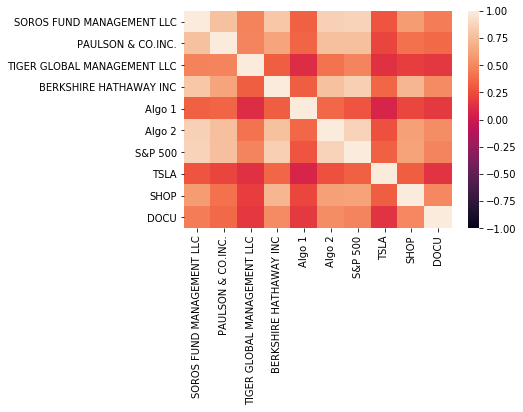

In [51]:
# Create a correlation analysis
joint_portfolio_returns_correlation = joint_portfolio_returns_df.corr()
sns.heatmap(joint_portfolio_returns_correlation, vmin=-1, vmax=1)

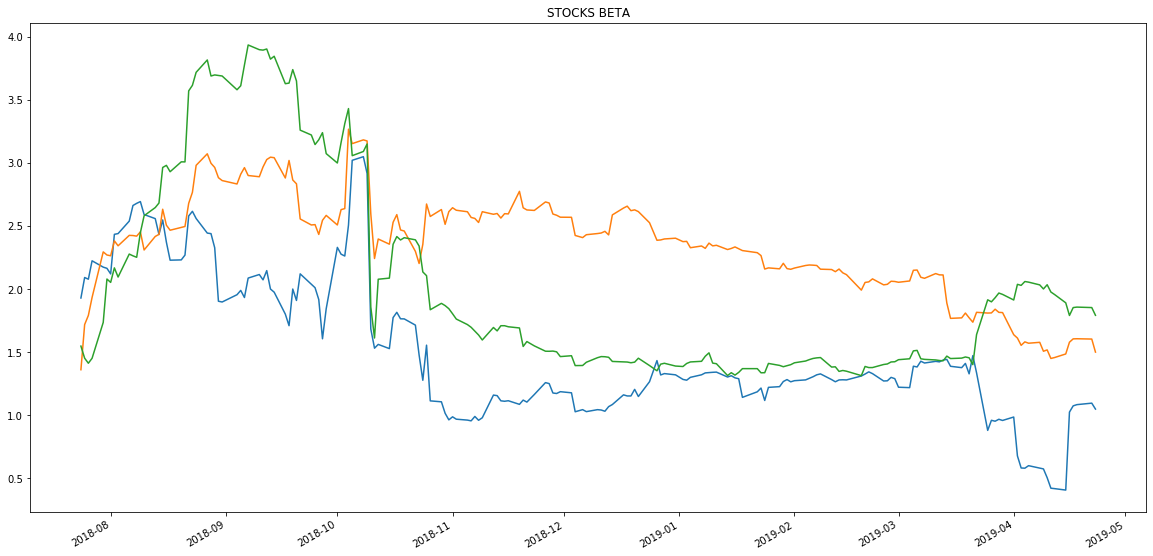

In [56]:
# Beta

joint_portfolio_returns_cov = joint_portfolio_returns_df.rolling(window=60).cov(joint_portfolio_returns_df['S&P 500'])
sp500_var_roll = joint_portfolio_returns_df['S&P 500'].rolling(window=60).var()
tsla_sp500_beta = joint_portfolio_returns_cov['TSLA']/sp500_var_roll
tsla_sp500_beta.plot(figsize=(20,10), title = 'STOCKS BETA')
shop_sp500_beta = joint_portfolio_returns_cov['SHOP']/sp500_var_roll
shop_sp500_beta.plot(figsize=(20,10), title = 'STOCKS BETA')
docu_sp500_beta = joint_portfolio_returns_cov['DOCU']/sp500_var_roll
docu_sp500_beta.plot(figsize=(20,10), title = 'STOCKS BETA')

In [ ]:
"Analysis: PHD Porfolio outperformed both Algo and Whale as well as the S&P 500 with Shopify as the best performing stockwith a cumulative return of 76.5%.